<a href="https://colab.research.google.com/github/Shin1am/EGBI222_Pair_Project_6713376_6713389/blob/main/EGBI222_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# For Github

In [ ]:
#config github
!git config --global user.email "Maimmchanel@gmail.com"
!git config --global user.email "Shin1am"

In [ ]:
#set up variable
from google.colab import userdata
import os

token = userdata.get("GITHUB_TOKEN")
os.environ['GITHUB_TOKEN'] = token
username = "Shin1am"
repo = "EGBI222_Pair_Project_6713376_6713389"

In [ ]:
#Clone Repo
!git clone https://{token}@github.com/{username}/{repo}.git


Cloning into 'EGBI222_Pair_Project_6713376_6713389'...


In [ ]:
!cd {repo} |

EGBI222_Pair_Project_6713376_6713389  sample_data


In [ ]:
#copy the file in drive into the /content for git
!rsync -av "/content/drive/MyDrive/Colab Notebooks/EGBI222_Project.ipynb" "/content/EGBI222_Pair_Project_6713376_6713389/"


sending incremental file list
EGBI222_Project.ipynb

sent 389,167 bytes  received 35 bytes  259,468.00 bytes/sec
total size is 388,970  speedup is 1.00


In [ ]:
%cd /content/{repo}


/content/EGBI222_Pair_Project_6713376_6713389


In [ ]:
!git add .

In [ ]:
!git commit -m "Add Colab"

[main (root-commit) 80ac20e] Add Colab
 1 file changed, 1 insertion(+)
 create mode 100644 EGBI222_Project.ipynb


In [ ]:
!git push origin main

Enumerating objects: 3, done.
Counting objects: 100% (3/3), done.
Delta compression using up to 2 threads
Compressing objects: 100% (2/2), done.
Writing objects: 100% (3/3), 177.10 KiB | 8.85 MiB/s, done.
Total 3 (delta 0), reused 0 (delta 0), pack-reused 0
To https://github.com/Shin1am/EGBI222_Pair_Project_6713376_6713389.git
 * [new branch]      main -> main


# Explore the DATA (EDA)


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip list | grep seaborn

seaborn                               0.13.2


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
file_paths = "/content/drive/MyDrive/healthcare-dataset-stroke-data.csv.xls"

df = pd.read_csv(file_paths)

df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3574,7964,Male,24.0,0,0,No,Private,Urban,97.47,24.2,formerly smoked,0
1473,66893,Male,49.0,1,0,Yes,Govt_job,Urban,139.43,40.2,formerly smoked,0
4295,57645,Female,75.0,0,0,Yes,Govt_job,Rural,132.46,26.2,Unknown,0
1180,46643,Female,62.0,0,0,Yes,Private,Rural,82.57,36.0,formerly smoked,0
3975,48169,Female,61.0,0,0,Yes,Self-employed,Urban,65.21,27.7,Unknown,0


In [10]:
df['stroke'].unique()

array([1, 0])

Age, Gender, Work_type, Residence_type, avg_glucose_level, BMI,

In [21]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.drop(columns='id', inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [17]:
round(df.describe(include='all'), 2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110,5110.00,5110.0,5110.00,5110,5110,5110,5110.00,4909.00,5110,5110.00
unique,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,NaN,43.23,0.1,0.05,NaN,NaN,NaN,106.15,28.89,NaN,0.05
std,NaN,22.61,0.3,0.23,NaN,NaN,NaN,45.28,7.85,NaN,0.22
min,NaN,0.08,0.0,0.00,NaN,NaN,NaN,55.12,10.30,NaN,0.00
25%,NaN,25.00,0.0,0.00,NaN,NaN,NaN,77.24,23.50,NaN,0.00
50%,NaN,45.00,0.0,0.00,NaN,NaN,NaN,91.88,28.10,NaN,0.00
75%,NaN,61.00,0.0,0.00,NaN,NaN,NaN,114.09,33.10,NaN,0.00


In [20]:
df.isna().sum()

print(df.isna().sum()/len(df) * 100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [23]:
df.isna().sum()

,0
gender,0
age,0
hypertension,0
heart_disease,0
ever_married,0
work_type,0
Residence_type,0
avg_glucose_level,0
bmi,0
smoking_status,0


In [22]:
df.dropna(how='any', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [24]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


# Plotting The graph


In [25]:
cols = df.columns[:]
cols

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [26]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


**Plotting The Graph between Age And BMI**


The BMI mean value is : 28.89 , which mean that overall sample is overweight.
The Age mean value is : 42.87 
---------------------------------------------------------- 

Graph


Text(0.5, 1.0, 'Graph between the age and bmi of sample')

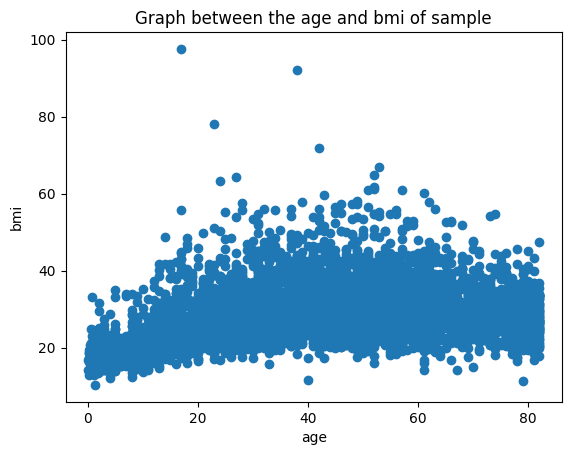

In [27]:
x = df["age"]
y = df["bmi"]

# fig, ax = plt.subplots(1,1, constrained_layout = True)

print(f"The BMI mean value is : {round(df['bmi'].mean(),2)} , which mean that overall sample is overweight.")
print(f"The Age mean value is : {round(df['age'].mean(),2)} ")

print("---------------------------------------------------------- \n")

print("Graph")

plt.scatter(x,y)
plt.xlabel('age')
plt.ylabel('bmi')
plt.title("Graph between the age and bmi of sample")



From The graph, we can assume that we use the sample in wide range of age, but the BMI value is aound 15-40.

**Plotting the graph for each cetegorical value**




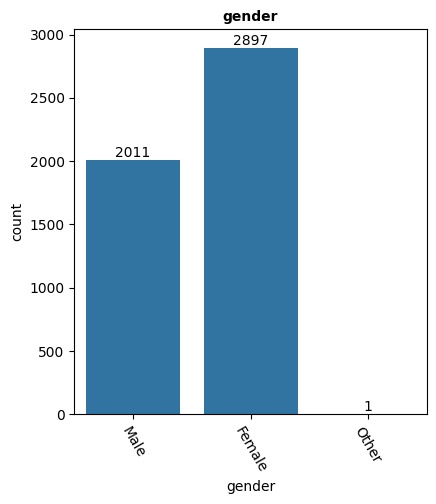

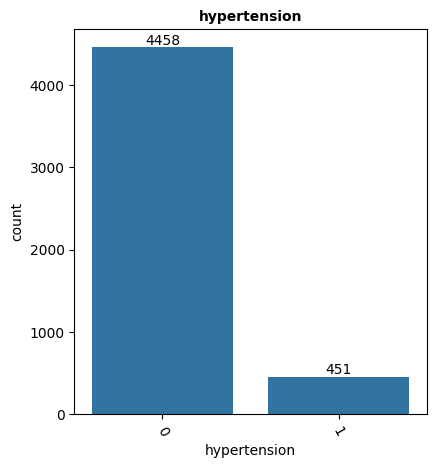

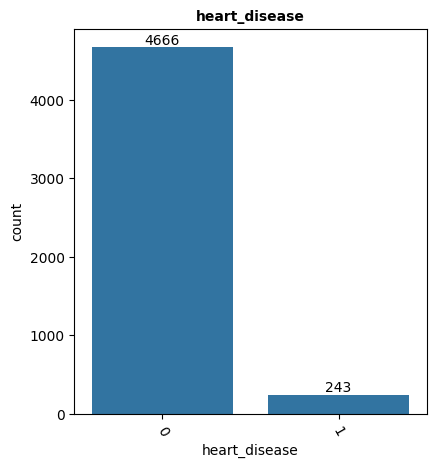

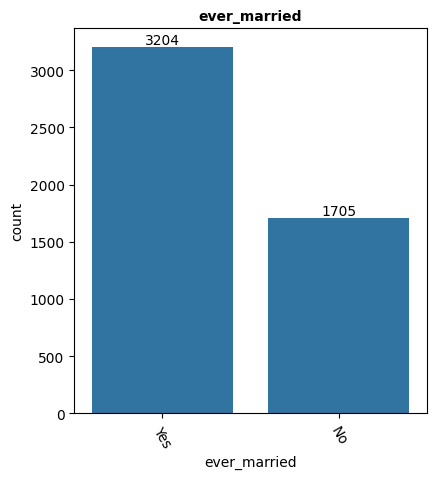

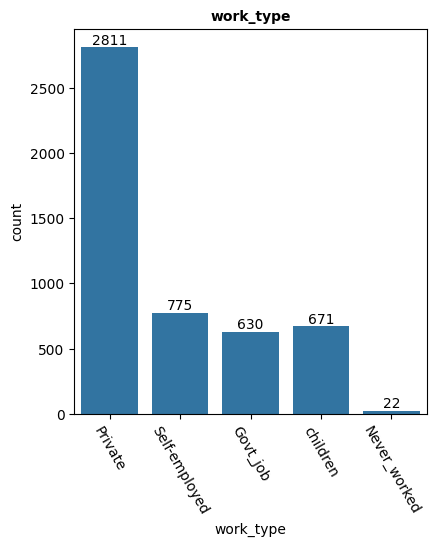

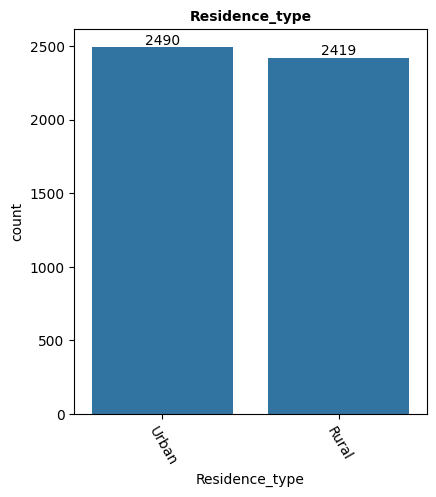

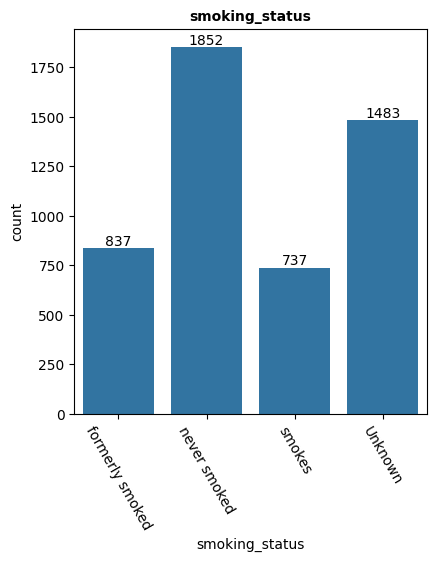

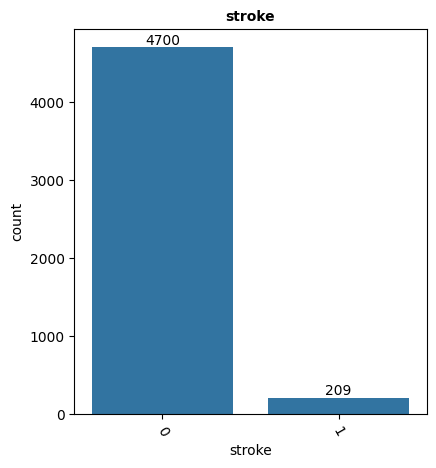

In [28]:
for i in range(len(categorical_cols)):

  fig = plt.figure(figsize=(10,5))
  plt.subplot(1, 2, 1)
  plt.title(categorical_cols[i], size=10, weight='bold')
  ax = sns.countplot(x=categorical_cols[i], data=df)
  ax.bar_label(ax.containers[0])
  ax.tick_params(axis='x', rotation=300)



# plt.ylabel('stroke')

#Plotting The heatmap between the work_type and Stroke

In [29]:
df['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [55]:
x = df.groupby(["work_type", "stroke"]).size().unstack(fill_value=0)

display(x)

stroke,0,1
work_type,,
Govt_job,602,28
Never_worked,22,0
Private,2684,127
Self-employed,722,53
children,670,1


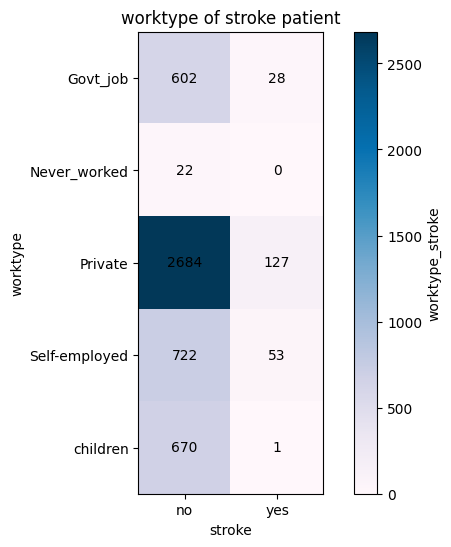

In [70]:
work_type = ['Govt_job', 'Never_worked', 'Private', 'Self-employed', 'children']
stroke = ['no','yes']

plt.figure(figsize=(8, 6))

plt.imshow(x, cmap='PuBu')
plt.colorbar(label ='worktype_stroke')
plt.yticks(ticks=np.arange(len(work_type)), labels=work_type)
plt.xticks(ticks=np.arange(len(stroke)), labels=stroke)

for i in range(len(work_type)):
    for j in range(len(stroke)):
        text = plt.text(j, i, f'{x.iloc[i, j]}',  # Access using iloc for integer position-based indexing
                       ha="center", va="center", color="black")

plt.title('worktype of stroke patient')
plt.xlabel('stroke')
plt.ylabel('worktype')
plt.show()

# Task
Analyze the relationship between age and stroke by grouping age into ranges and visualizing the stroke occurrences within each range using a bar plot.

## Create age bins

### Subtask:
Divide the 'age' column into appropriate bins.


**Reasoning**:
Define age bins and create a new 'age_bin' column using pd.cut().



In [42]:
# Define age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

# Create 'age_bin' column
df['age_bin'] = pd.cut(df['age'], bins=age_bins, right=False)

# Display the first few rows with the new column
display(df.head())

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_bin
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,"[60, 70)"
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,"[80, 90)"
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,"[40, 50)"
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,"[70, 80)"
5,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,"[80, 90)"


## Group by age bin and stroke

### Subtask:
Group the DataFrame by the newly created age bins and the 'stroke' column.


**Reasoning**:
Group the DataFrame by age bin and stroke, count the occurrences, unstack, and fill missing values with 0.



In [43]:
age_stroke_counts = df.groupby(['age_bin', 'stroke']).size().unstack(fill_value=0)
display(age_stroke_counts)

/tmp/ipython-input-3938994846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_stroke_counts = df.groupby(['age_bin', 'stroke']).size().unstack(fill_value=0)


stroke,0,1
age_bin,,
"[0, 10)",459,0
"[10, 20)",484,1
"[20, 30)",539,0
"[30, 40)",626,5
"[40, 50)",693,12
"[50, 60)",764,41
"[60, 70)",550,40
"[70, 80)",442,71
"[80, 90)",143,39


## Plot the data

### Subtask:
Create a bar plot to visualize the relationship between age ranges and stroke occurrences.


**Reasoning**:
Create a bar plot showing the distribution of stroke occurrences within each age bin.



In [44]:
age_stroke_counts[['0', '1']].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stroke Occurrences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

KeyError: "None of [Index(['0', '1'], dtype='object', name='stroke')] are in the [columns]"

**Reasoning**:
The previous code failed because the column names for the stroke variable are integers 0 and 1, not strings '0' and '1'. I need to use the correct integer column names to plot the data.



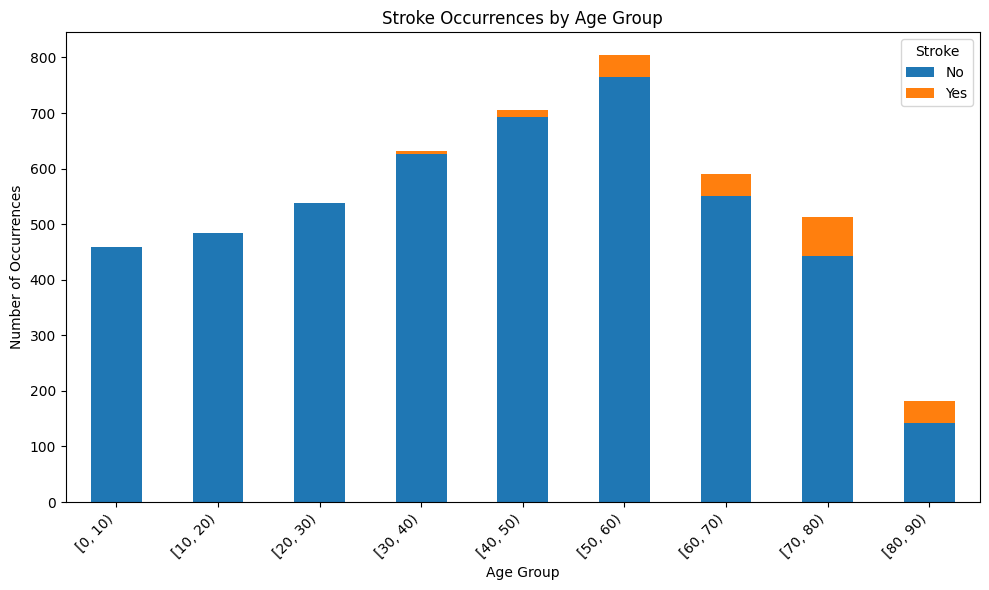

In [52]:
age_stroke_counts[[0,1]].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Stroke Occurrences by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Stroke', labels=['No','Yes'])
plt.tight_layout()
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of individuals experiencing a stroke generally increases with age, becoming particularly noticeable in age groups above 50.
*   The age binning process successfully categorized individuals into predefined age ranges (0-10, 10-20, ..., 80-90).
*   Grouping the data by age bin and stroke status revealed the distribution of stroke cases and non-cases across different age groups.

### Insights or Next Steps

*   Further analysis could involve calculating the proportion of stroke cases within each age group to understand the age-specific stroke risk more clearly.
*   Investigate other potential risk factors for stroke within the higher-risk age groups identified in this analysis.


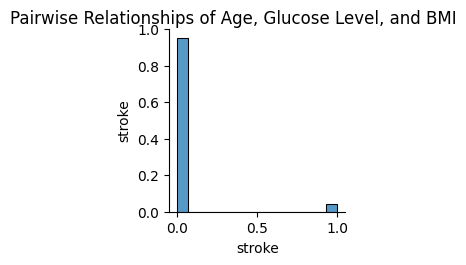

In [58]:
cols = ['ever_married', 'gender', 'stroke']
sns.pairplot(df[cols])
plt.suptitle('Pairwise Relationships of Age, Glucose Level, and BMI', y=1.02)
plt.show()

stroke                  0    1
gender ever_married           
Female No             948   16
       Yes           1829  104
Male   No             733    7
       Yes           1189   82
Other  No               1    0

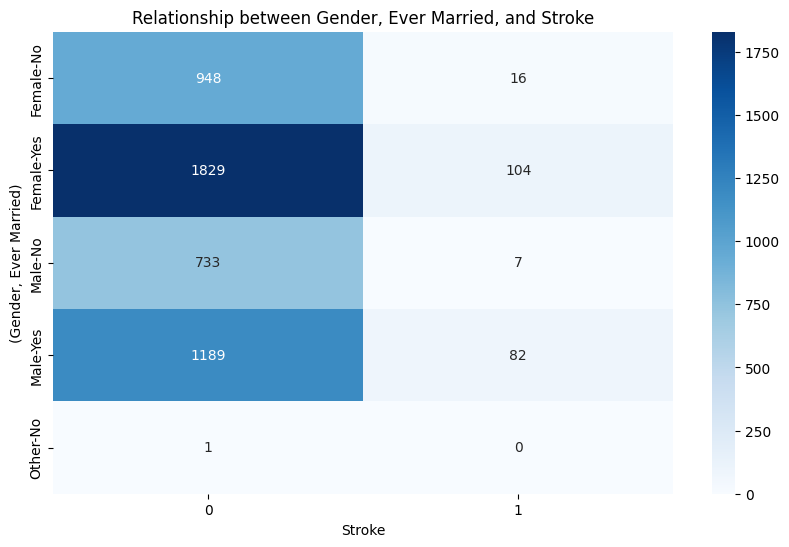

In [60]:
# Group by three categorical columns and count the occurrences
grouped_counts = df.groupby(['gender', 'ever_married', 'stroke']).size().unstack(fill_value=0)

# Display the grouped counts
display(grouped_counts)

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(grouped_counts, annot=True, fmt='d', cmap='Blues')
plt.title('Relationship between Gender, Ever Married, and Stroke')
plt.xlabel('Stroke')
plt.ylabel('(Gender, Ever Married)')
plt.show()

# Stroke Prediction Dataset Analysis

This notebook explores a healthcare dataset to analyze factors related to stroke occurrences.

## Data Description

The dataset contains information about patients, including:

*   **gender**: Gender of the patient
*   **age**: Age of the patient
*   **hypertension**: 0 if the patient has no hypertension, 1 if the patient has hypertension
*   **heart_disease**: 0 if the patient has no heart disease, 1 if the patient has heart disease
*   **ever_married**: "No" or "Yes"
*   **work_type**: "children", "Govt_job", "Never_worked", "Private", "Self-employed"
*   **Residence_type**: "Rural" or "Urban"
*   **avg_glucose_level**: Average glucose level in blood
*   **bmi**: Body mass index
*   **smoking_status**: "formerly smoked", "never smoked", "smokes", "Unknown"
*   **stroke**: 1 if the patient had a stroke or 0 if not

The dataset initially contained missing values in the 'bmi' column, which were removed for this analysis. The 'id' column was also dropped as it is not relevant for the analysis.

## Exploratory Data Analysis (EDA)

### Age and BMI Relationship

The scatter plot below shows the relationship between age and BMI in the dataset.